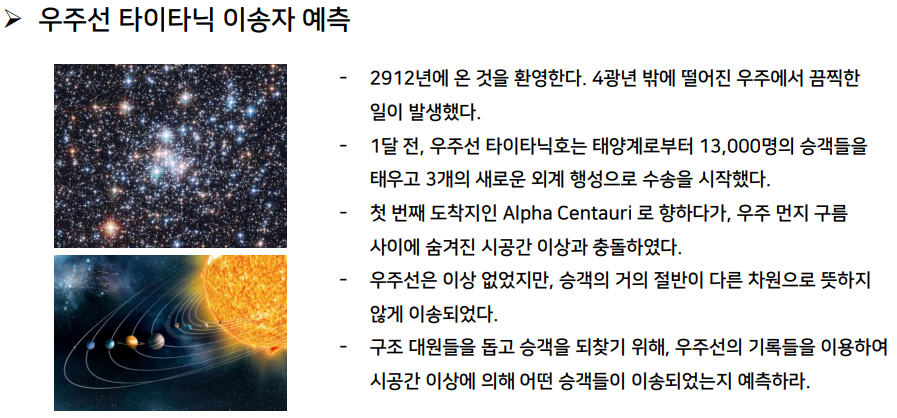

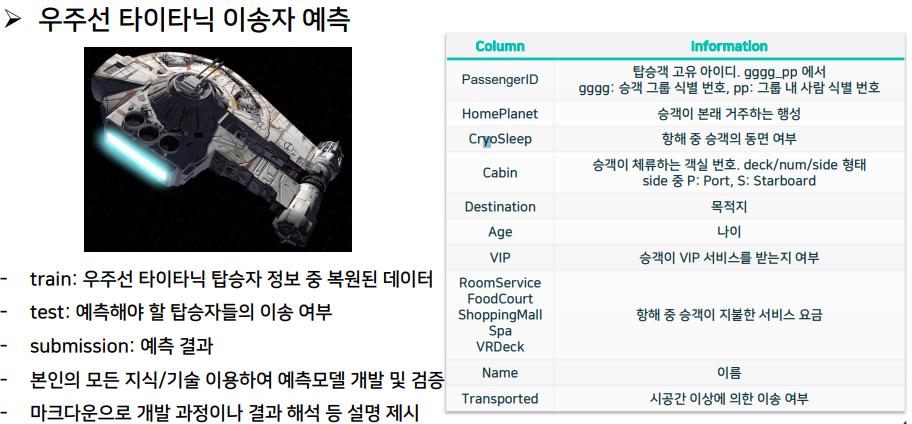

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
train=pd.read_csv("train_tf.csv")
test=pd.read_csv("test_tf.csv")
submission=pd.read_csv('submission_titanic2.csv')

# DATA

In [3]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
submission.head()

,0,PassengerId
0,False,0001_01
1,False,0002_01
2,False,0003_01
3,False,0003_02
4,True,0004_01


In [6]:
submission.tail()

,0,PassengerId
8688,False,9276_01
8689,True,9278_01
8690,True,9279_01
8691,False,9280_01
8692,True,9280_02


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
# PassengerId,Transported 빼고 전부 결측치가 존재
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# EDA

- 데이터간 관계확인, 결측치 채우기, 범주형 변수처리하기, 피쳐 변형하기

## Transported

Text(0.5, 1.0, 'Target distribution')

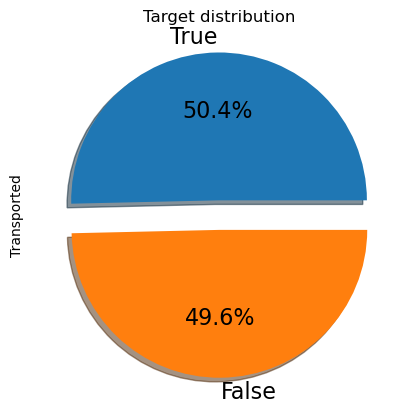

In [10]:
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, 
                                             textprops={'fontsize':16}).set_title("Target distribution")

## Age

Text(0.5, 0, 'Age (years)')

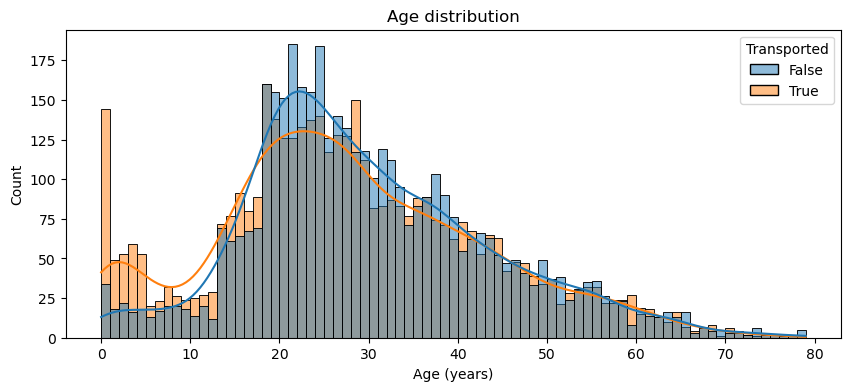

In [11]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1,kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

## HomePlanet

In [12]:
#Earth 지구/ Europa 위성/ Mars 화성
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

<AxesSubplot:ylabel='HomePlanet'>

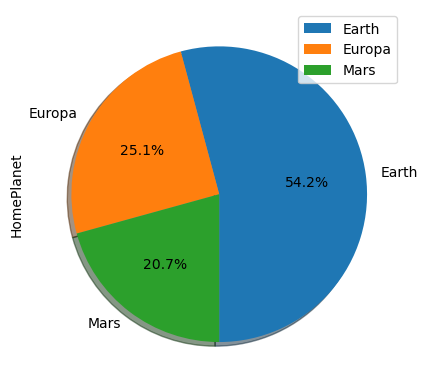

In [13]:
train['HomePlanet'].value_counts().plot(kind="pie",autopct = '%1.1f%%',shadow=True, 
                                    startangle = -90,legend = True)

In [14]:
train.groupby(['HomePlanet',])["Transported"].mean()*100

HomePlanet
Earth     42.394611
Europa    65.884561
Mars      52.302445
Name: Transported, dtype: float64

<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

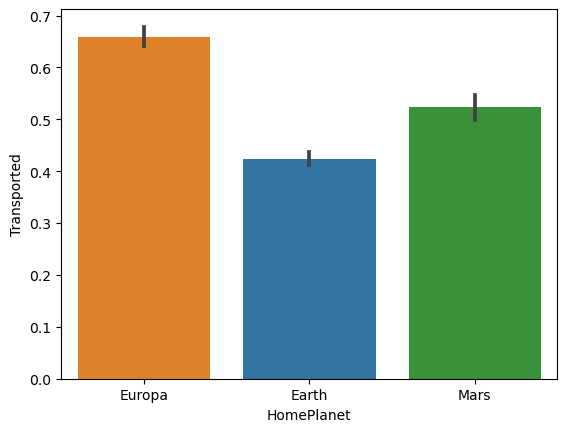

In [15]:
# HomePlanet별 이송된 비율
colors =["#fd7e0d","#2077b4","#2aa02c"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x="HomePlanet",y="Transported",data=train)

## Destination

In [16]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:ylabel='Destination'>

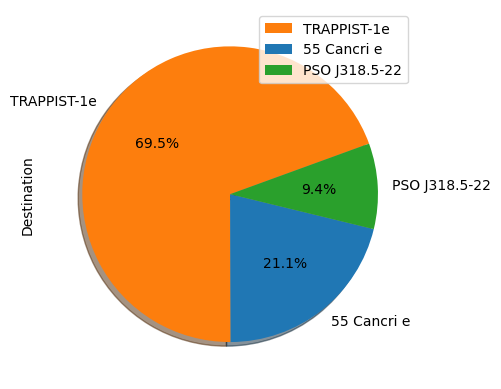

In [17]:
train['Destination'].value_counts().plot(kind="pie",autopct = '%1.1f%%',shadow=True, 
                                    startangle =20,legend = True)

In [18]:
train.groupby(['Destination',])["Transported"].mean()*100

Destination
55 Cancri e      61.000000
PSO J318.5-22    50.376884
TRAPPIST-1e      47.117498
Name: Transported, dtype: float64

<AxesSubplot:xlabel='Destination', ylabel='Transported'>

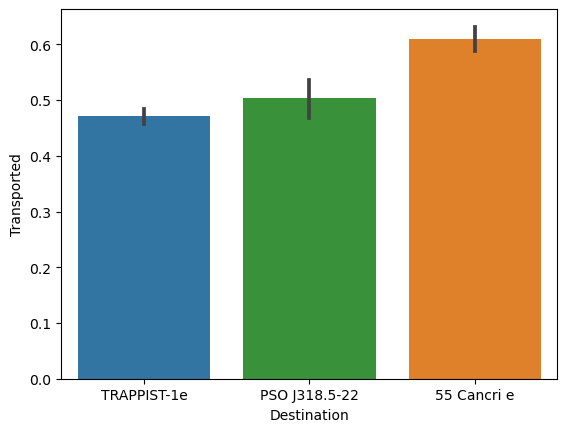

In [19]:
# 목적지별 이송된 비율
colors =["#2077b4","#2aa02c","#fd7e0d"]
sns.set_palette(sns.color_palette(colors))
sns.barplot(x="Destination",y="Transported",data=train)

## CryoSleep

In [20]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

<AxesSubplot:ylabel='CryoSleep'>

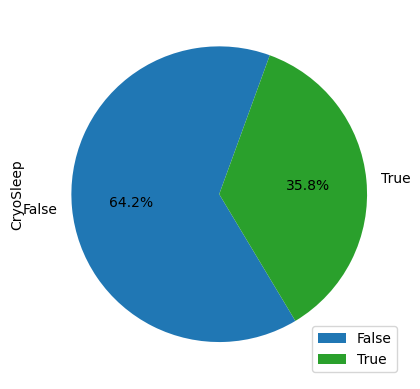

In [21]:
train['CryoSleep'].value_counts().plot(kind="pie",autopct = '%1.1f%%',
                                    startangle =70,legend = True)

In [22]:
train.groupby(['CryoSleep',])["Transported"].mean()*100

CryoSleep
False    32.892076
True     81.758314
Name: Transported, dtype: float64

## VIP

In [23]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

<AxesSubplot:ylabel='VIP'>

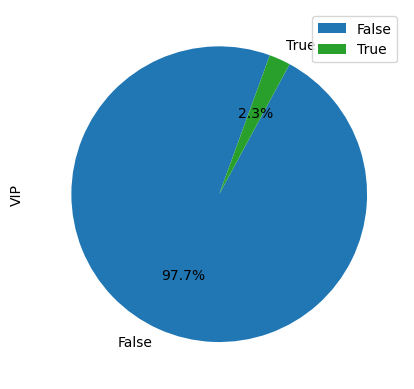

In [24]:
train['VIP'].value_counts().plot(kind="pie",autopct = '%1.1f%%',
                                    startangle =70,legend = True)

In [25]:
# 결측치를 채우기전에 데이터를 합쳐줌
all_data = pd.concat([train, test], sort = False)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [26]:
all_data.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [27]:
train.groupby(['VIP',])["Transported"].mean()*100

VIP
False    50.633217
True     38.190955
Name: Transported, dtype: float64

In [28]:
# VIP의 True/False를 1.0/0.0 으로 변환했음
train["VIP"] = train["VIP"].astype(float)

In [29]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Cabin

In [30]:
train['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

- Cabin은 전처리를 해주어야 데이터를 사용할 수 있을 것 같다.

## Features & Transported

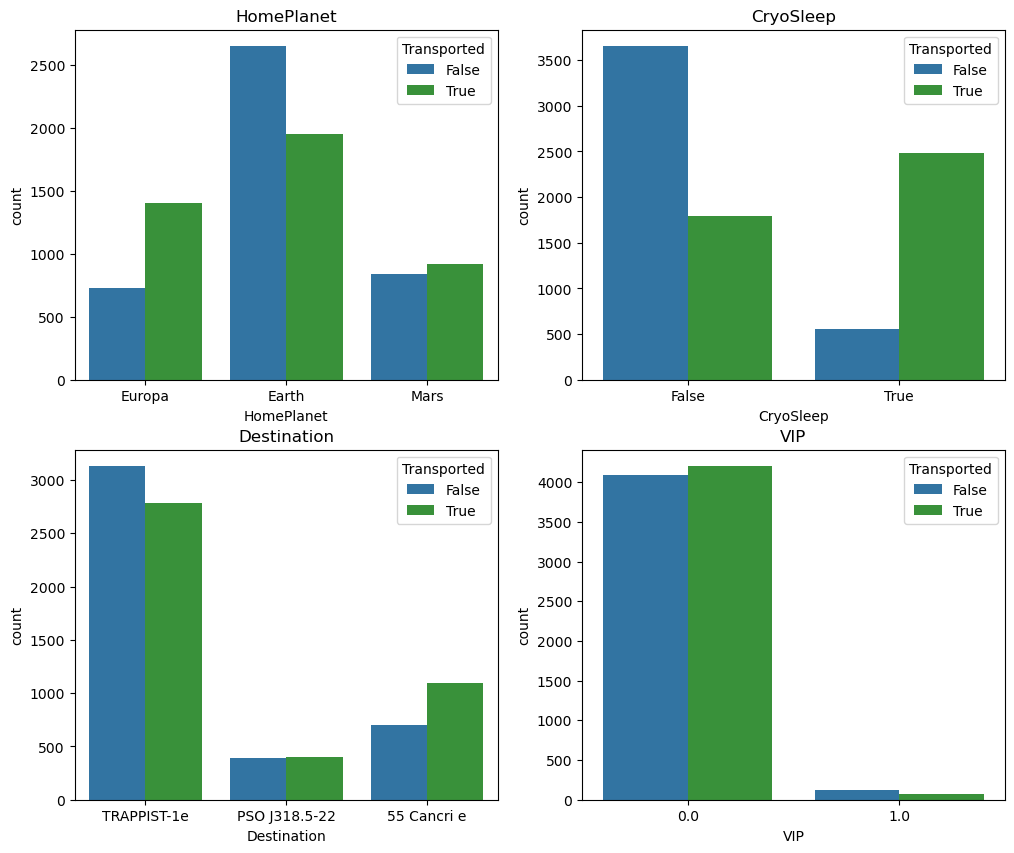

In [31]:
# 범주형 피쳐들에 대해 이송된 숫자를 시각화
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig=plt.figure(figsize=(12,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,2,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)

plt.show()

- VIP는 별 역할을 못하는 것으로 나타남-> drop 할까
- CryoSleep 그래프가 매우 대조적이므로 유용해보임

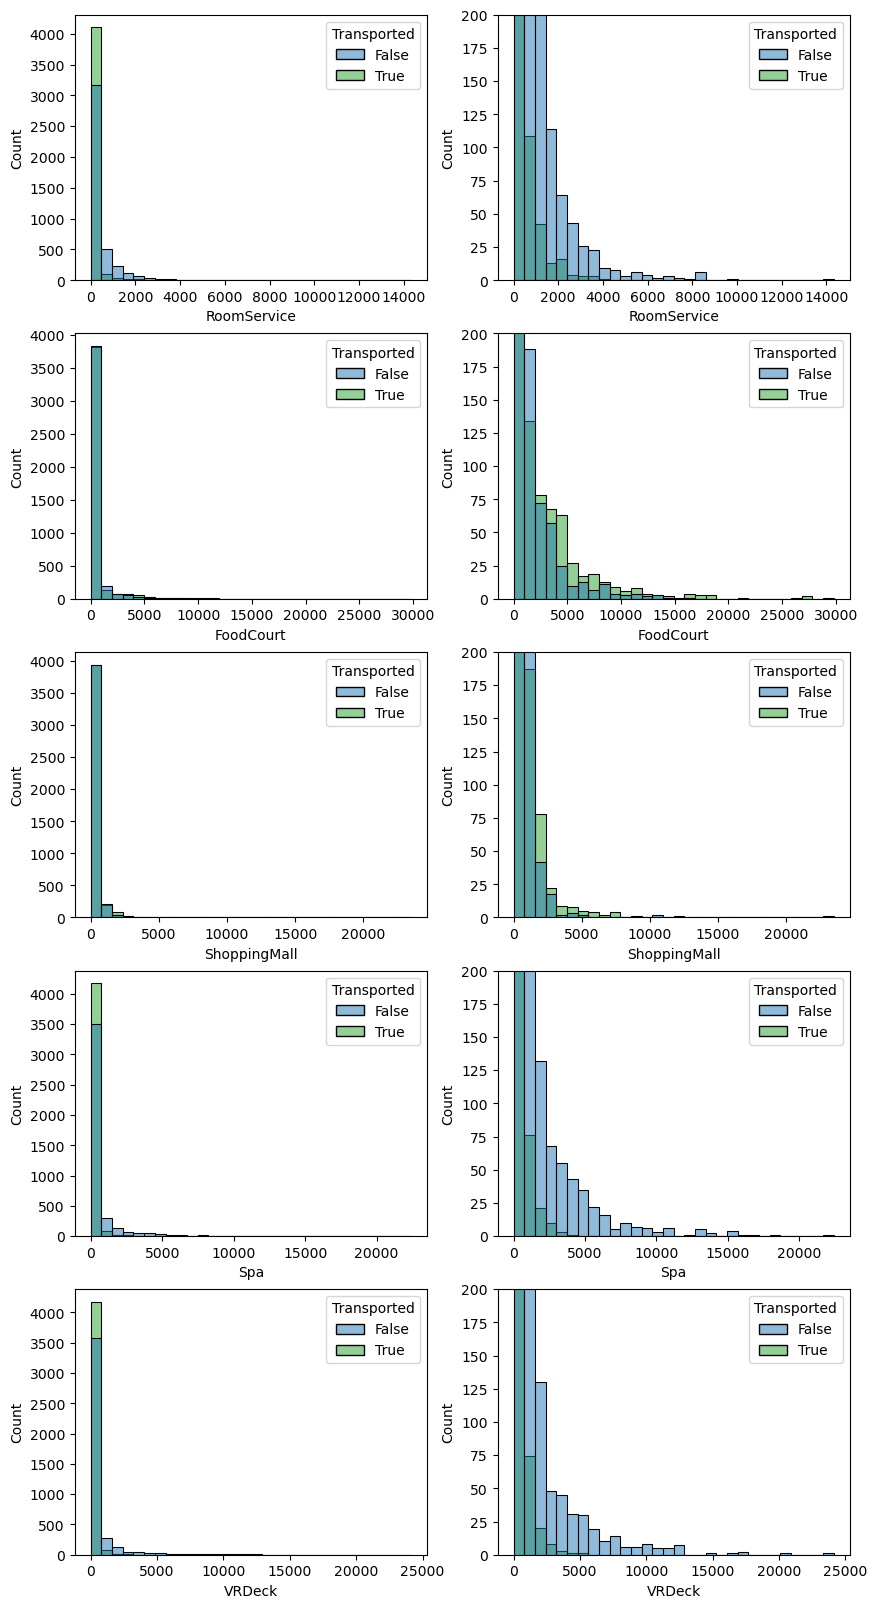

In [32]:
# 소비한 피쳐들에 대한 이송된 숫자를 시각화
exp_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    # 왼쪽 열
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    
    # 오른쪽 열, y축 범위를 200까지해서 잘 안보이는 부분을 확대함
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    plt.ylim([0,200])
plt.show()

- 돈을 소비한 그래프 편차가 매우크다.(로그스케일해줄것)
- 이상치가 약간 존재하는 것 같다.
- 돈을 적게 쓴사람들이 이송된 비율이 높았다.-> 의미가 있는지는 모르겠음
- 돈과 이송의 관계보다는 그 위치나 어떤 장소이느냐가 더 의미가 있을 것 같다.

- 5개의 지출 피쳐를 묶어서 하나의 피쳐로 바꿔주자
- 지출을 한사람과 안한사람 그룹을 나누어주자
- 로그스케일을 적용해주자

# 전처리

## Cabin 전처리

- 선박에선 방향을 꺾을 때, Port(좌현), Starboard(우현)라는 말을 씁니다.
- Port는 뱃머리를 향해서 좌측의 뱃전, Starboard는 뱃머리를 향해서 우측의 뱃전이라는 의미죠.
- Deck = 갑판

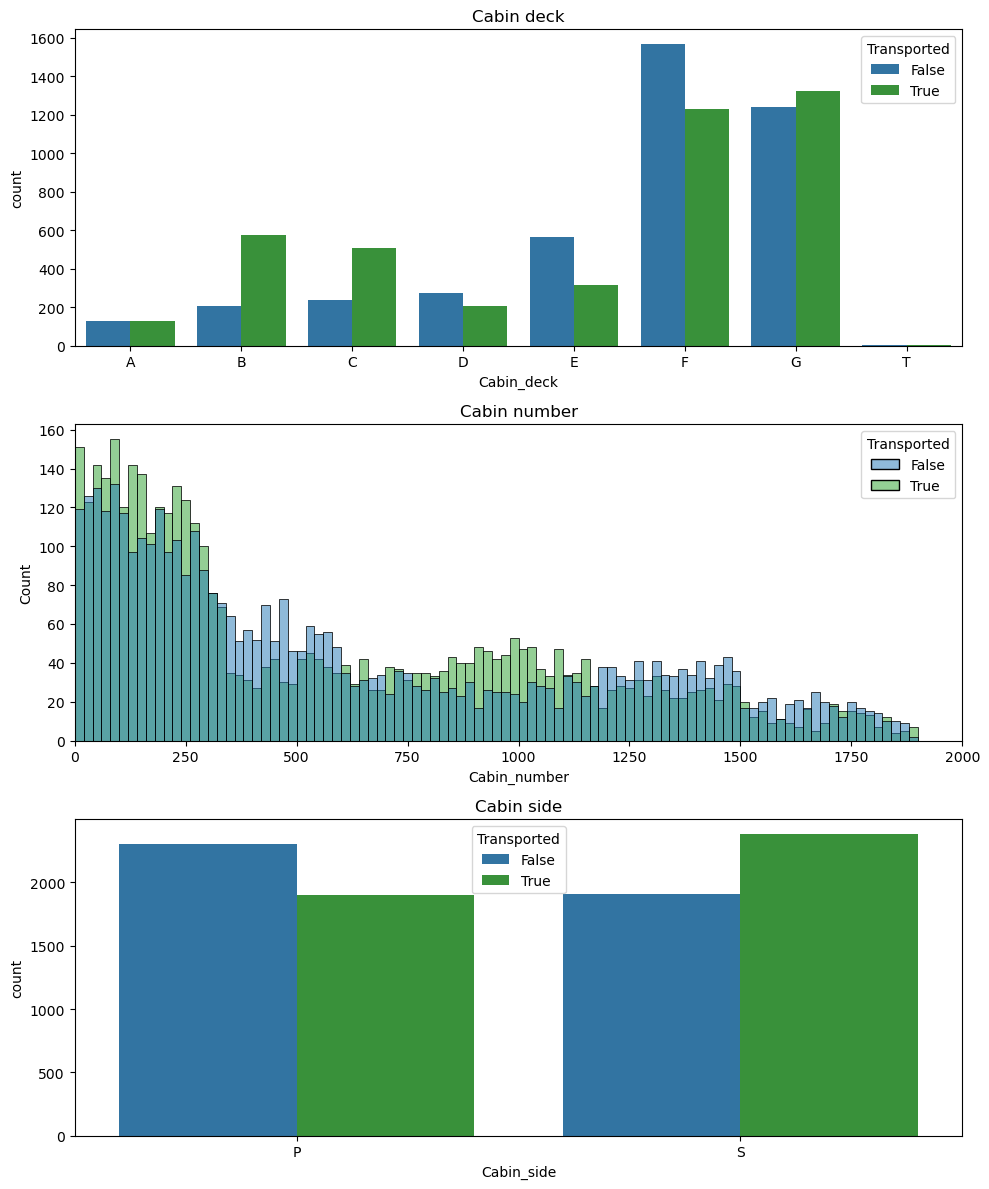

In [33]:
# NaN 값을 대충 채워서 전처리 할 수 있게 만들자
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# Cabin의 각각을 분리해 새로운 피쳐로 만들자 - training set
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

#Cabin의 각각을 분리해 새로운 피쳐로 만들자 - test set
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

# NaN을 채운 것을 의미있는 값으로 바꿔 주기 위해서 다시 NaN으로 바꿔준다.
train.loc[train['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
train.loc[train['Cabin_number']==9999, 'Cabin_number']=np.nan
train.loc[train['Cabin_side']=='Z', 'Cabin_side']=np.nan
test.loc[test['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
test.loc[test['Cabin_number']==9999, 'Cabin_number']=np.nan
test.loc[test['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Cabin은 이제 드롭한다.
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# 새로 나눈 피쳐와 Transported의 관계를 시각화 해보자.

fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)

plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

- 위의 그림을 보니 T는 이상치라고 보고 없애도 무방 할 것 같다.

In [34]:
# # Cabin_number를 구간별로 나누어 새로운 피쳐로 만들어주고 범주형으로 바꾸어 주겠다.
# train['Cabin_region1']=(train['Cabin_number']<300).astype(int)   # one-hot encoding
# train['Cabin_region2']=((train['Cabin_number']>=300) & (train['Cabin_number']<600)).astype(int)
# train['Cabin_region3']=((train['Cabin_number']>=600) & (train['Cabin_number']<900)).astype(int)
# train['Cabin_region4']=((train['Cabin_number']>=900) & (train['Cabin_number']<1200)).astype(int)
# train['Cabin_region5']=((train['Cabin_number']>=1200) & (train['Cabin_number']<1500)).astype(int)
# train['Cabin_region6']=((train['Cabin_number']>=1500) & (train['Cabin_number']<1800)).astype(int)
# train['Cabin_region7']=(train['Cabin_number']>=1800).astype(int)

# # Cabin_number를 구간별로 나누어 새로운 피쳐로 만들어주고 범주형으로 바꾸어 주겠다.
# test['Cabin_region1']=(test['Cabin_number']<300).astype(int)   # one-hot encoding
# test['Cabin_region2']=((test['Cabin_number']>=300) & (test['Cabin_number']<600)).astype(int)
# test['Cabin_region3']=((test['Cabin_number']>=600) & (test['Cabin_number']<900)).astype(int)
# test['Cabin_region4']=((test['Cabin_number']>=900) & (test['Cabin_number']<1200)).astype(int)
# test['Cabin_region5']=((test['Cabin_number']>=1200) & (test['Cabin_number']<1500)).astype(int)
# test['Cabin_region6']=((test['Cabin_number']>=1500) & (test['Cabin_number']<1800)).astype(int)
# test['Cabin_region7']=(test['Cabin_number']>=1800).astype(int)

# # 새로만든 피쳐를 시각화해보자.
# plt.figure(figsize=(10,4))

# # 시각화를 위해 편의상 피쳐를 하나 만들어준다. 밑에서 제거할것임.
# train['Cabin_regions_plot']=(train['Cabin_region1']+2*train['Cabin_region2']+3*train['Cabin_region3']+4*train['Cabin_region4']+5*train['Cabin_region5']+6*train['Cabin_region6']+7*train['Cabin_region7']).astype(int)
# sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
# plt.title('Cabin regions')
# # 시각화 이후 피쳐 삭제
# train.drop('Cabin_regions_plot', axis=1, inplace=True)

위의 표에 0은 nan값

## Age 전처리

Text(0.5, 1.0, 'Age group distribution')

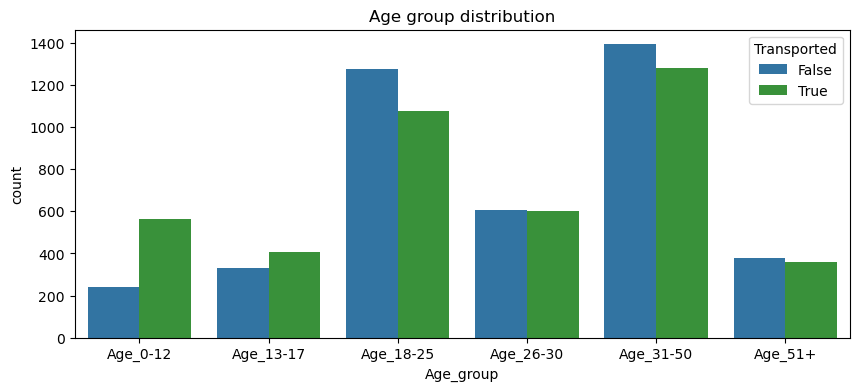

In [35]:
# Age를 나이대 별로 나누어 새로운 피쳐를 생성해주자.
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0-12'
train.loc[(train['Age']>12) & (train['Age']<18),'Age_group']='Age_13-17'
train.loc[(train['Age']>=18) & (train['Age']<=25),'Age_group']='Age_18-25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26-30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31-50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

# Age를 나이대 별로 나누어 새로운 피쳐를 생성해주자.
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

# Age_group과 Transported의 관계를 시각화 해보자.
plt.figure(figsize=(10,4))
g=sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

In [36]:
# NaN 값들을 처리하기가 애매함.. 평균으로 대체하자

## VIP 전처리

In [37]:
train.drop('VIP', axis=1, inplace=True)
test.drop('VIP', axis=1, inplace=True)

## RoomService/FoodCourt/ShoppingMall/Spa/	VRDeck	전처리

- 지출내역들을 합쳐서 총지출 피처를 만들고 지출을 한 탑승객과 그렇지 않은 탑승객을 구분하겠다.(0,1)

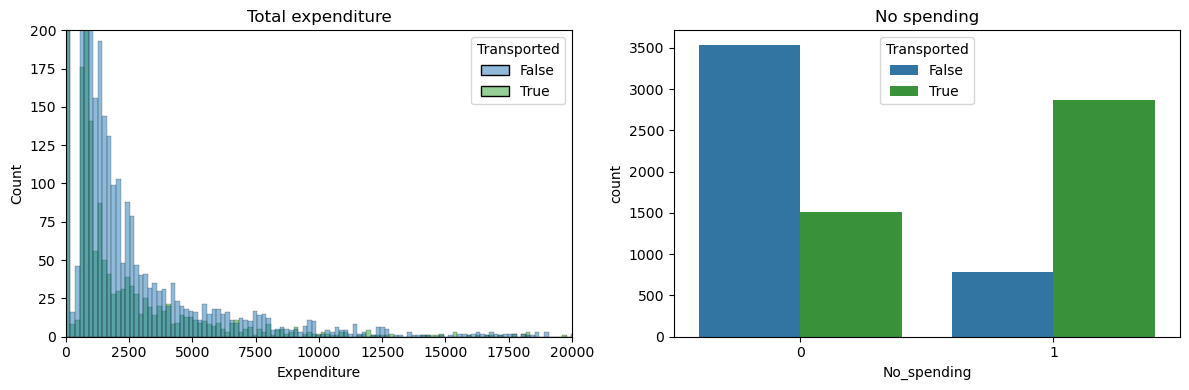

In [38]:
# RoomService/FoodCourt/ShoppingMall/Spa/ VRDeck 피쳐를 통합하는 Expenditure 피쳐를 만든다.
train['Expenditure']=train[exp_features].sum(axis=1)

# 그리고 소비한 사람과 안한 사람을 구분하기 위해 No_spending 피쳐를 만든다.
# 원핫으로 지출내역이 있으면 0 지출내역이 없으면 1로 표기.
train['No_spending']=(train['Expenditure']==0).astype(int) 

# RoomService/FoodCourt/ShoppingMall/Spa/ VRDeck 피쳐를 통합하는 Expenditure 피쳐를 만든다.
test['Expenditure']=test[exp_features].sum(axis=1)
test['No_spending']=(test['Expenditure']==0).astype(int)

# 시각화
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No spending')
fig.tight_layout()

In [39]:
# 로그스케일로 바꾸자

In [40]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,Age_group,Expenditure,No_spending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,Age_31-50,0.0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,Age_18-25,736.0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,Age_51+,10383.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,Age_31-50,5176.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,Age_13-17,1091.0,0


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Cabin_deck    8494 non-null   object 
 13  Cabin_number  8494 non-null   float64
 14  Cabin_side    8494 non-null   object 
 15  Age_group     8514 non-null   object 
 16  Expenditure   8693 non-null   float64
 17  No_spending   8693 non-null   int32  
dtypes: bool(1), float64(8), int3

## NaN 값 채우기

In [42]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Cabin_deck      199
Cabin_number    199
Cabin_side      199
Age_group       179
Expenditure       0
No_spending       0
dtype: int64

In [43]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,Age_group,Expenditure,No_spending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,Age_31-50,0.0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,Age_18-25,736.0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,Age_51+,10383.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,Age_31-50,5176.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,Age_13-17,1091.0,0


In [44]:
# 최빈값으로 채우기
train['HomePlanet'].fillna('Earth',inplace=True)
train['CryoSleep'].fillna('False',inplace=True)
train['Destination'].fillna('TRAPPIST-1e',inplace=True)
train['Cabin_deck'].fillna('F',inplace=True)
train['Cabin_number'].fillna(train['Cabin_number'].median(),inplace=True)
train['Cabin_side'].fillna('Z',inplace=True) # P와 S가 비슷해서 아예 관계없는 것으로 채움
# 평균으로 채우기
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['RoomService'].fillna(train['RoomService'].mean(),inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(),inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(),inplace=True)
train['Spa'].fillna(train['Spa'].mean(),inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(),inplace=True)

# 최빈값으로 채우기
test['HomePlanet'].fillna('Earth',inplace=True)
test['CryoSleep'].fillna('False',inplace=True)
test['Destination'].fillna('TRAPPIST-1e',inplace=True)
test['Cabin_deck'].fillna('F',inplace=True)
test['Cabin_number'].fillna(test['Cabin_number'].median(),inplace=True)
test['Cabin_side'].fillna('Z',inplace=True) # P와 S가 비슷해서 아예 관계없는 것으로 채움
# 평균으로 채우기
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['RoomService'].fillna(test['RoomService'].mean(),inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(),inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(),inplace=True)
test['Spa'].fillna(test['Spa'].mean(),inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(),inplace=True)

In [45]:
# Age 결측치 채운걸로 다시 구간나누기
train['Age_group']=np.nan
train.loc[train['Age']<=12,'Age_group']='Age_0-12'
train.loc[(train['Age']>12) & (train['Age']<18),'Age_group']='Age_13-17'
train.loc[(train['Age']>=18) & (train['Age']<=25),'Age_group']='Age_18-25'
train.loc[(train['Age']>25) & (train['Age']<=30),'Age_group']='Age_26-30'
train.loc[(train['Age']>30) & (train['Age']<=50),'Age_group']='Age_31-50'
train.loc[train['Age']>50,'Age_group']='Age_51+'

# Age 결측치 채운걸로 다시 구간나누기
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Name          8493 non-null   object 
 11  Transported   8693 non-null   bool   
 12  Cabin_deck    8693 non-null   object 
 13  Cabin_number  8693 non-null   float64
 14  Cabin_side    8693 non-null   object 
 15  Age_group     8693 non-null   object 
 16  Expenditure   8693 non-null   float64
 17  No_spending   8693 non-null   int32  
dtypes: bool(1), float64(8), int3

In [47]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_number,Cabin_side,Age_group,Expenditure,No_spending
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,Age_31-50,0.0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,Age_18-25,736.0,0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,Age_51+,10383.0,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,Age_31-50,5176.0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,Age_13-17,1091.0,0


In [48]:
train['Cabin_deck'].value_counts()

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [49]:
save=pd.DataFrame(train['PassengerId'])

In [50]:
save

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01
...,...
8688,9276_01
8689,9278_01
8690,9279_01
8691,9280_01


In [51]:
train.drop(['Name','PassengerId'], axis=1, inplace=True)
test.drop(['Name','PassengerId'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Transported   8693 non-null   bool   
 10  Cabin_deck    8693 non-null   object 
 11  Cabin_number  8693 non-null   float64
 12  Cabin_side    8693 non-null   object 
 13  Age_group     8693 non-null   object 
 14  Expenditure   8693 non-null   float64
 15  No_spending   8693 non-null   int32  
dtypes: bool(1), float64(8), int32(1), object(6)
memory usage: 993.4+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   RoomService   4277 non-null   float64
 5   FoodCourt     4277 non-null   float64
 6   ShoppingMall  4277 non-null   float64
 7   Spa           4277 non-null   float64
 8   VRDeck        4277 non-null   float64
 9   Cabin_deck    4277 non-null   object 
 10  Cabin_number  4277 non-null   float64
 11  Cabin_side    4277 non-null   object 
 12  Age_group     4277 non-null   object 
 13  Expenditure   4277 non-null   float64
 14  No_spending   4277 non-null   int32  
dtypes: float64(8), int32(1), object(6)
memory usage: 484.6+ KB


## 범주형 변수들 원핫인코딩하기

In [53]:
encoder = LabelEncoder()
train['HomePlanet'] = encoder.fit_transform(train['HomePlanet'])
train['Destination'] = encoder.fit_transform(train['Destination'])
train['Cabin_deck'] = encoder.fit_transform(train['Cabin_deck'])

test['HomePlanet'] = encoder.fit_transform(test['HomePlanet'])
test['Destination'] = encoder.fit_transform(test['Destination'])
test['Cabin_deck'] = encoder.fit_transform(test['Cabin_deck'])

In [54]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_number,Cabin_side,Age_group,Expenditure,No_spending
0,1,False,2,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0.0,P,Age_31-50,0.0,1
1,0,False,2,24.0,109.0,9.0,25.0,549.0,44.0,True,5,0.0,S,Age_18-25,736.0,0
2,1,False,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,0.0,S,Age_51+,10383.0,0
3,1,False,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,0.0,S,Age_31-50,5176.0,0
4,0,False,2,16.0,303.0,70.0,151.0,565.0,2.0,True,5,1.0,S,Age_13-17,1091.0,0


In [55]:
# 범주형 feature 가변수화하기
train = pd.get_dummies(train, drop_first=False)
test = pd.get_dummies(test, drop_first=False)
train.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,...,CryoSleep_False,Cabin_side_P,Cabin_side_S,Cabin_side_Z,Age_group_Age_0-12,Age_group_Age_13-17,Age_group_Age_18-25,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+
0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,1,0,0,0,0,0,0,1,0
1,0,2,24.0,109.0,9.0,25.0,549.0,44.0,True,5,...,0,0,1,0,0,0,1,0,0,0
2,1,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,0,1,0,0,0,0,0,0,1
3,1,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2,16.0,303.0,70.0,151.0,565.0,2.0,True,5,...,0,0,1,0,0,1,0,0,0,0


In [56]:
train.drop(['Cabin_side_Z'], axis=1, inplace=True)
test.drop(['Cabin_side_Z'], axis=1, inplace=True)
train.head()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,...,CryoSleep_True,CryoSleep_False,Cabin_side_P,Cabin_side_S,Age_group_Age_0-12,Age_group_Age_13-17,Age_group_Age_18-25,Age_group_Age_26-30,Age_group_Age_31-50,Age_group_Age_51+
0,1,2,39.0,0.0,0.0,0.0,0.0,0.0,False,1,...,0,0,1,0,0,0,0,0,1,0
1,0,2,24.0,109.0,9.0,25.0,549.0,44.0,True,5,...,0,0,0,1,0,0,1,0,0,0
2,1,2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,0,0,1,0,0,0,0,0,1
3,1,2,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,0,0,1,0,0,0,0,1,0
4,0,2,16.0,303.0,70.0,151.0,565.0,2.0,True,5,...,0,0,0,1,0,1,0,0,0,0


In [57]:
train.columns

Index(['HomePlanet', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_deck',
       'Cabin_number', 'Expenditure', 'No_spending', 'CryoSleep_False',
       'CryoSleep_True', 'CryoSleep_False', 'Cabin_side_P', 'Cabin_side_S',
       'Age_group_Age_0-12', 'Age_group_Age_13-17', 'Age_group_Age_18-25',
       'Age_group_Age_26-30', 'Age_group_Age_31-50', 'Age_group_Age_51+'],
      dtype='object')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           8693 non-null   int32  
 1   Destination          8693 non-null   int32  
 2   Age                  8693 non-null   float64
 3   RoomService          8693 non-null   float64
 4   FoodCourt            8693 non-null   float64
 5   ShoppingMall         8693 non-null   float64
 6   Spa                  8693 non-null   float64
 7   VRDeck               8693 non-null   float64
 8   Transported          8693 non-null   bool   
 9   Cabin_deck           8693 non-null   int32  
 10  Cabin_number         8693 non-null   float64
 11  Expenditure          8693 non-null   float64
 12  No_spending          8693 non-null   int32  
 13  CryoSleep_False      8693 non-null   uint8  
 14  CryoSleep_True       8693 non-null   uint8  
 15  CryoSleep_False      8693 non-null   u

In [59]:
train['Cabin_number']

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
8688      98.0
8689    1499.0
8690    1500.0
8691     608.0
8692     608.0
Name: Cabin_number, Length: 8693, dtype: float64

# 베이스 모델

In [60]:
X_titanic_df=train.drop('Transported',axis=1)
y_titanic_df=train['Transported']

In [61]:
# "Train data 정의"
# 학습을 하기 위한 Input 값 - 전체 컬럼에서 Transported 제외
X_train = train.drop(['Transported'],axis=1)

# 학습을 예측하기 위한 Output 값 'Transported'만 가져오기
y_train = train['Transported']


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7487
RandomForestClassifier 정확도: 0.8051
LogisticRegression 정확도: 0.7913


C:\Users\ebdl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds,shuffle=True,random_state=11)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7539
교차 검증 1 정확도: 0.7550
교차 검증 2 정확도: 0.7458
교차 검증 3 정확도: 0.7555
교차 검증 4 정확도: 0.7440
평균 정확도: 0.7508


In [65]:
# cross_val_score() 클래스
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4}'.format(iter_count, accuracy))
    
print('평균 정확도: {:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.72
교차 검증 1 정확도: 0.6757
교차 검증 2 정확도: 0.7217
교차 검증 3 정확도: 0.7946
교차 검증 4 정확도: 0.7117
평균 정확도: 0.7247


In [66]:
# GridSearchCV() 클래스
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10, 14],
             'min_samples_split': [2, 3, 5, 8],
             'min_samples_leaf': [1, 5, 8, 13]
             }

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(f'GridSearchCV 최적 하이퍼 파라미터: {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도: {round(grid_dclf.best_score_, 4)}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f'테스트 세트에서의 DecisionTreeClassifier 정확도: {round(accuracy, 4)}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 14, 'min_samples_leaf': 13, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.778
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.7798


In [67]:
prediction = rf_clf.predict(X_titanic_df)
prediction

array([False, False, False, ...,  True, False,  True])

In [68]:
df=pd.DataFrame(prediction)

In [69]:
df

,0
0,False
1,False
2,False
3,False
4,True
...,...
8688,False
8689,True
8690,True
8691,False


In [70]:
save

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01
...,...
8688,9276_01
8689,9278_01
8690,9279_01
8691,9280_01


In [71]:
df=pd.concat([df,save],axis=1)

In [72]:
df

,0,PassengerId
0,False,0001_01
1,False,0002_01
2,False,0003_01
3,False,0003_02
4,True,0004_01
...,...,...
8688,False,9276_01
8689,True,9278_01
8690,True,9279_01
8691,False,9280_01


In [73]:
df.rename(columns={0:'Transported'},inplace=True)

In [74]:
df.to_csv('submission_titanic3.csv',index=False)